# Importieren der Bibliotheken

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.express as pxc
from ipywidgets import interact


## Laden der Datei

In [51]:
# Laden der Datei in ein Pandas DataFrame
datei_path = r".\Features_for_SHAP32rpm_repaierd.txt"
df = pd.read_csv(datei_path)

# Anzeigen der ersten Zeilen des DataFrames
df.tail()

,Cov1_1,Cov1_2,Cov1_4,Cov1_5,Cov1_7,Cov1_8,Cov1_10,Cov1_11,Cov2_2,Cov2_4,...,DC2_RPM,Wind_Direction,Temperature,Preciptation,Generator_on_off,Power_kW,Pitch_deg,Yaw,Azimuth,novelty_index
2922,1926.096405,22.077982,175.857296,-45.826991,50.419635,-196.514162,-19.894280,17.230319,106.262023,73.319511,...,32.025182,225.3840,2.175221,0.005802,1.0,-0.203927,-0.204647,10.02373,-35.567223,19.300004
2923,1968.053957,1.849336,237.957362,-40.600944,37.026843,-172.434916,-17.566236,12.396130,92.356970,53.739386,...,32.024936,225.4025,2.175308,0.005802,1.0,-0.203776,-0.166080,10.02100,-35.075370,18.866672
2924,1878.377866,17.217453,313.894413,-33.844109,56.978583,-157.683324,-14.607295,7.955903,96.110466,57.960094,...,32.025416,224.6777,2.154097,0.005802,1.0,-0.202933,-0.446031,10.02232,-27.235961,19.676828
2925,1883.592661,56.197118,452.159911,-29.978124,108.109518,-139.086048,6.094632,11.027323,106.358605,72.326554,...,32.026613,220.8360,2.157872,0.005802,1.0,-0.202147,-0.475663,10.02020,6.454405,19.960807
2926,1888.385538,48.195217,431.133481,-29.426011,87.764201,-129.770940,21.244808,12.426216,108.380538,70.841707,...,32.031763,213.0807,2.180657,0.005802,1.0,-0.202552,-0.527526,10.03005,104.349985,22.522516


### Auffüllen fehlender Werte durch Mittelwert

In [52]:
df = df.fillna(df.mean())

In [53]:
df.columns

Index(['Cov1_1', 'Cov1_2', 'Cov1_4', 'Cov1_5', 'Cov1_7', 'Cov1_8', 'Cov1_10',
       'Cov1_11', 'Cov2_2', 'Cov2_4', 'Cov2_5', 'Cov2_7', 'Cov2_8', 'Cov2_10',
       'Cov2_11', 'Cov4_4', 'Cov4_5', 'Cov4_7', 'Cov4_8', 'Cov4_10', 'Cov4_11',
       'Cov5_5', 'Cov5_7', 'Cov5_8', 'Cov5_10', 'Cov5_11', 'Cov7_7', 'Cov7_8',
       'Cov7_10', 'Cov7_11', 'Cov8_8', 'Cov8_10', 'Cov8_11', 'Cov10_10',
       'Cov10_11', 'Cov11_11', 'WindSpeed', 'DC1_RPM', 'DC2_RPM',
       'Wind_Direction', 'Temperature', 'Preciptation', 'Generator_on_off',
       'Power_kW', 'Pitch_deg', 'Yaw', 'Azimuth', 'novelty_index'],
      dtype='object')

## Normalisieren

In [54]:
from sklearn.preprocessing import StandardScaler

# Features und Label definieren
features = df.drop(columns=["novelty_index"])  # Alle außer Label und alten Novelty-Index


# Standardisierung
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# DataFrame mit standardisierten Werten erstellen
df_scaled = pd.DataFrame(X_scaled, columns=features.columns)



## Feature Selection

In [55]:
features_Cov_1 = df[['Cov1_1', 'Cov1_2', 'Cov1_4', 'Cov1_5', 'Cov1_7', 'Cov1_8', 'Cov1_10','Cov1_11']]

features_Cov_2 = df[['Cov2_2', 'Cov2_4', 'Cov2_5', 'Cov2_7', 'Cov2_8', 'Cov2_10','Cov2_11', 'Cov1_2']]

features_Cov_4 = df[['Cov4_4', 'Cov4_5', 'Cov4_7', 'Cov4_8', 'Cov4_10', 'Cov4_11', 'Cov1_4', 'Cov2_4']]

features_Cov_5 = df[['Cov5_5', 'Cov5_7', 'Cov5_8', 'Cov5_10', 'Cov5_11', 'Cov1_5', 'Cov2_5', 'Cov4_5']]

features_Cov_7 = df[['Cov7_7', 'Cov7_8','Cov7_10', 'Cov7_11', 'Cov1_7', 'Cov2_7', 'Cov4_7', 'Cov5_7']]

features_Cov_8 = df[['Cov8_8', 'Cov8_10', 'Cov8_11', 'Cov1_8', 'Cov2_8', 'Cov4_8', 'Cov5_8', 'Cov7_8']]

features_Cov_10 = df[['Cov10_10', 'Cov10_11', 'Cov1_10', 'Cov2_10', 'Cov4_10', 'Cov5_10', 'Cov7_10', 'Cov8_10']]

features_Cov_11 = df[['Cov11_11', 'Cov1_11', 'Cov2_11', 'Cov4_11', 'Cov5_11', 'Cov7_11', 'Cov8_11', 'Cov10_11']]

# Szenario Auswahl

In [56]:
Wind_und_Leistungsdaten=df[['WindSpeed', 'Power_kW', 'DC1_RPM', 'DC2_RPM']]

Umweltbedingungen_und_Leistung = df[['Temperature', 'Preciptation', 'Power_kW']]

ausrichtung_und_Leistung = df[['Pitch_deg', 'Yaw', 'Azimuth', 'Power_kW']]


In [57]:
feature_cov_columns = [col for col in df.columns if "Cov" in col]

# Mittelwert für die gesichert gesunden Daten

In [58]:

healthy_mean = df_scaled.iloc[:1000][feature_cov_columns].mean()


# Funktion zur Berechnung der Euklidischen Distanz

df_scaled['novelty_index_new'] = np.sqrt(((df_scaled[feature_cov_columns] - healthy_mean) ** 2).sum(axis=1))

In [59]:
def euclidean_distance(column_names):
    """ Berechnet die euklidische Distanz für eine gegebene Menge von Spaltennamen """
    common_columns = list(set(column_names) & set(healthy_mean.index))  # Gemeinsame Spalten finden
    return np.sqrt(((df_scaled[common_columns] - healthy_mean.loc[common_columns]) ** 2).sum(axis=1))


# Alle Euklidischen distanzen 

In [60]:
df_scaled_Euklidische_d  = {
    'dist_Cov_1': euclidean_distance(features_Cov_1),
    'dist_Cov_2': euclidean_distance(features_Cov_2),
    'dist_Cov_4': euclidean_distance(features_Cov_4),
    'dist_Cov_5': euclidean_distance(features_Cov_5),
    'dist_Cov_7': euclidean_distance(features_Cov_7),
    'dist_Cov_8': euclidean_distance(features_Cov_8),
    'dist_Cov_10': euclidean_distance(features_Cov_10),
    'dist_Cov_11': euclidean_distance(features_Cov_11),
    'dist_Cov_gesamt': euclidean_distance(feature_cov_columns)
}

distances_df_scaled = pd.DataFrame(df_scaled_Euklidische_d)

In [61]:
distances_df_scaled["novelty_index"] = df["novelty_index"]

In [62]:
distances_df_label = pd.DataFrame()


In [63]:
min_vals, max_vals = distances_df_scaled.iloc[:1000].min(), distances_df_scaled.iloc[:1000].max()

for col in distances_df_scaled:
    distances_df_label[f'label_{col}'] = (distances_df_scaled[col] < min_vals[col]) | (distances_df_scaled[col] > max_vals[col])


In [66]:
distances_df_label.head()

,label_dist_Cov_1,label_dist_Cov_2,label_dist_Cov_4,label_dist_Cov_5,label_dist_Cov_7,label_dist_Cov_8,label_dist_Cov_10,label_dist_Cov_11,label_dist_Cov_gesamt,label_novelty_index
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [67]:
distances_df_scaled.head()

,dist_Cov_1,dist_Cov_2,dist_Cov_4,dist_Cov_5,dist_Cov_7,dist_Cov_8,dist_Cov_10,dist_Cov_11,dist_Cov_gesamt,novelty_index
0,1.718542,1.282777,1.910006,1.786579,1.668240,1.885854,1.941548,2.375972,4.043083,6.079959
1,1.898052,1.037423,1.980151,2.441673,2.578180,1.930044,1.610357,2.658384,4.315061,6.131423
2,2.632563,1.874535,1.789182,1.681630,2.354549,2.133552,2.023134,2.766792,4.484005,6.508935
3,2.811628,3.258588,3.068211,1.879999,2.029573,3.227815,2.992010,2.107552,5.762891,6.365396
4,2.092628,2.104611,2.448295,2.826199,2.208460,2.871937,2.497259,2.882761,5.475922,6.319523


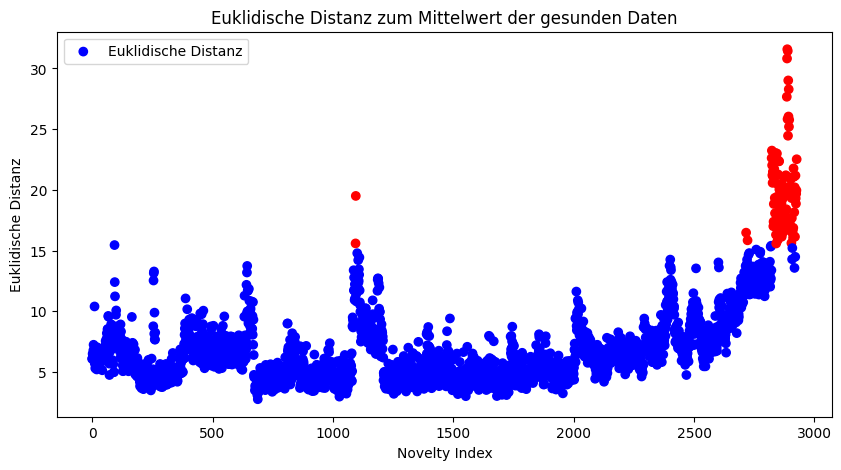

In [ ]:
#df_scaled['novelety_index_new'] = np.sqrt(((df_scaled[columns] - mean_healthy) ** 2).sum(axis=1))

plt.figure(figsize=(10, 5))
plt.scatter(range(len(distances_df_scaled)), distances_df_scaled['novelty_index'], c=distances_df_label['label_novelty_index'], cmap='bwr', label='Novelety Index')
plt.xlabel('Novelty Index')
plt.ylabel('Euklidische Distanz')
plt.title('Euklidische Distanz zum Mittelwert der gesunden Daten')
plt.legend()
plt.show()

In [72]:
column_names = distances_df_scaled.columns
column_names_2 = distances_df_label.columns


In [74]:
print(column_names)
print(column_names_2)


Index(['dist_Cov_1', 'dist_Cov_2', 'dist_Cov_4', 'dist_Cov_5', 'dist_Cov_7',
       'dist_Cov_8', 'dist_Cov_10', 'dist_Cov_11', 'dist_Cov_gesamt',
       'novelty_index'],
      dtype='object')
Index(['label_dist_Cov_1', 'label_dist_Cov_2', 'label_dist_Cov_4',
       'label_dist_Cov_5', 'label_dist_Cov_7', 'label_dist_Cov_8',
       'label_dist_Cov_10', 'label_dist_Cov_11', 'label_dist_Cov_gesamt',
       'label_novelty_index'],
      dtype='object')


Dropdown(description='Spalte:', index=2, options=('dist_Cov_1', 'dist_Cov_2', 'dist_Cov_4', 'dist_Cov_5', 'dis…

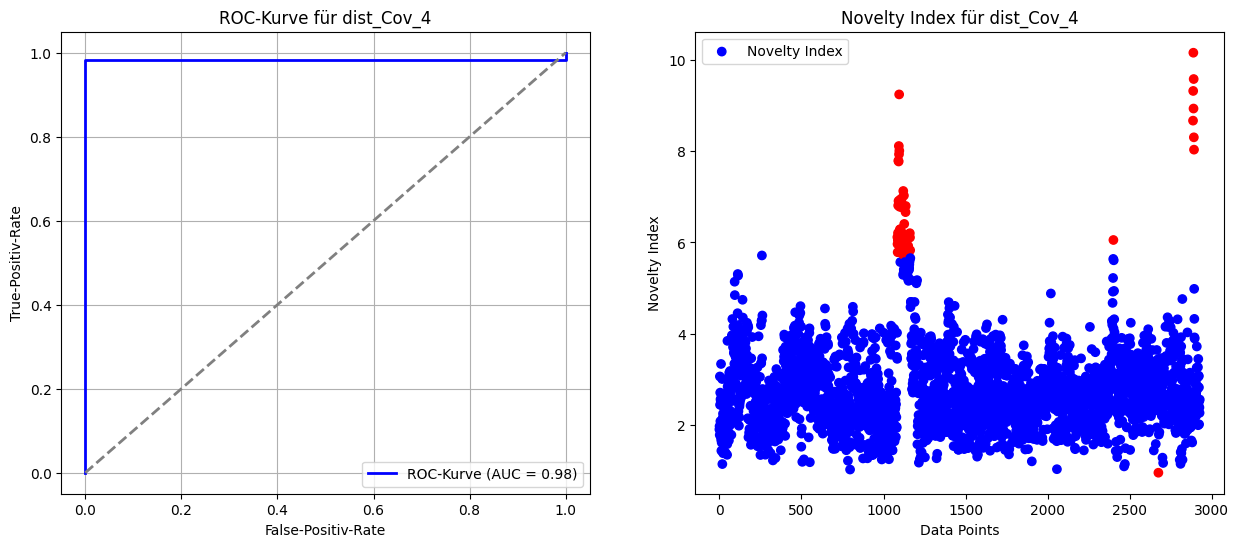

In [84]:
def plot_roc_curve(column_name):
    """Plotet die ROC-Kurve für die ausgewählte Spalte."""
    fpr, tpr, _ = roc_curve(distances_df_label[f'label_{column_name}'], distances_df_scaled[column_name])
    roc_auc = auc(fpr, tpr)

    fig, axes = plt.subplots(1, 2, figsize=(15, 6)) # Create 1 row, 2 columns of subplots


    scatter = axes[1].scatter(range(len(distances_df_scaled)), distances_df_scaled[column_name], 
    c= distances_df_label[f'label_{column_name}'], cmap='bwr', label='Novelty Index')
    axes[1].set_xlabel('Data Points')
    axes[1].set_ylabel('Novelty Index')
    axes[1].set_title(f'Novelty Index für {column_name}')
    axes[1].legend()

# First plot (ROC Curve)
    axes[0].plot(fpr, tpr, color='blue', lw=2, label=f'ROC-Kurve (AUC = {roc_auc:.2f})')
    axes[0].plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
    axes[0].set_xlabel('False-Positiv-Rate')
    axes[0].set_ylabel('True-Positiv-Rate')
    axes[0].set_title(f'ROC-Kurve für {column_name}')
    axes[0].legend(loc='lower right')
    axes[0].grid()


def on_column_change(change):
    """Wird aufgerufen, wenn die ausgewählte Spalte geändert wird."""
    clear_output()
    display(column_dropdown)
    plot_roc_curve(change.new)

# Erstellen des Dropdown-Menüs
column_dropdown = widgets.Dropdown(
    options=list(distances_df_scaled.columns),
    description='Spalte:',
    disabled=False,
)

# Verbinden des Dropdown-Menüs mit der Funktion on_column_change
column_dropdown.observe(on_column_change, names='value')

# Anzeigen des Dropdown-Menüs und des ersten Plots
display(column_dropdown)
plot_roc_curve(column_dropdown.value)

# Fazit

